In [1]:
#Import the required Libraries
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Create functions which takes in strike price and premium and return the expected payoff as a funciton of stock price at expiry
def long_call(strike, premium):
    num = int(10**(round(np.log10(strike))-1))//5
    start = round(strike) - num
    end = round(strike) + num
    x = np.linspace(start,end,(end+1)*100)
    y = np.maximum(-premium,x-strike-premium)
    return x,y

def short_call(strike, premium):
    num = int(10**(round(np.log10(strike))-1))//5
    start = round(strike) - num
    end = round(strike) + num
    x = np.linspace(start,end,(end+1)*100)
    y = -np.maximum(-premium,x-strike-premium)
    return x,y

def long_put(strike, premium):
    
    num = int(10**(round(np.log10(strike))-1))//5
    start = round(strike) - num
    end = round(strike) + num
    x = np.linspace(start,end,(end+1)*100)
    y = np.maximum(-premium,strike-x-premium)
    return x,y

def short_put(strike, premium):
    
    num = int(10**(round(np.log10(strike))-1))//5
    start = round(strike) - num
    end = round(strike) + num
    x = np.linspace(start,end,(end+1)*100)
    y = -np.maximum(-premium,strike-x-premium)
    return x,y
#Create the plot_the_gain function to plot the gain of combination of options
def plot_the_gain(x,y,strike):
    start =  strike[0]- (10**(round(np.log10(np.median(x)))-1))//5
    plt.figure(figsize=(16,6))
    plt.plot(x,y)
    
    plt.axhline(0,color='k',ls=":")
    
    plt.axhline(min(y),color="red",ls=":")
    plt.text(start,min(y),round(min(y),2),horizontalalignment='left',verticalalignment="bottom",fontsize=12,color="red")
    
    plt.axhline(max(y),color="green",ls=":")
    plt.text(start,max(y),round(max(y),2),horizontalalignment='left',verticalalignment="bottom",fontsize=12,color="green")
    
    for i in strike:
        plt.axvline(i,color="k",ls=":")
        plt.text(i,0,i,horizontalalignment='right',verticalalignment="bottom",fontsize=10,color="k")
    plt.xlabel("Stock Price at expiry", fontsize=15)
    plt.ylabel("Payoff", fontsize=15)
    plt.tight_layout()
#Analyze the resultant payoff of a strategy and return key parameters
def analyze(y):    
    print("R2R is ", max(y)/abs(min(y)))
    print("Max Loss is ", round(min(y),2))
    print("Max Profit is", round(max(y),2))

R2R is  0.5873015873015875
Max Loss is  -0.16
Max Profit is 0.09


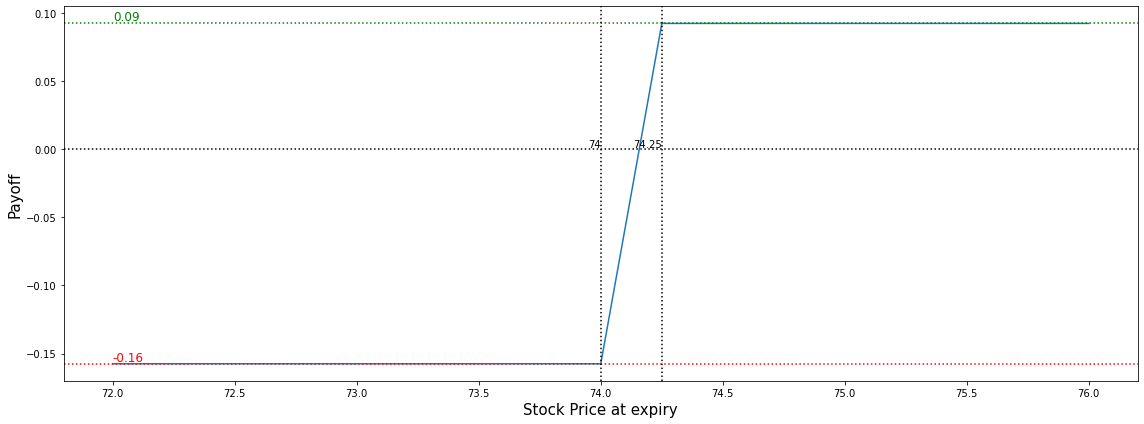

In [30]:
call_strike = [74, 74.25, 74.5, 74.75]
premium_call = [0.7625, 0.605, 0.4775, 0.355]


put_strike = [74, 74.25, 74.5, 74.75]
premium_put = [0.2, 0.2875, 0.4, 0.55]

i = 0
j = 1
x1,y1 = long_call(call_strike[i],premium_call[i])
x2,y2 = short_call(call_strike[j], premium_call[j])

x = x1
y = y1 + y2
plot_the_gain(x,y,[call_strike[i],call_strike[j]])
analyze(y)

In [31]:
# To know the breakeven point
ind = list(y).index(min(abs(y)))
round(x[ind],2)

74.16